In [1]:
    import numpy as np 
    import pandas as pd
    import matplotlib.pyplot as plt
    import tensorflow as tf 
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense
    from tensorflow.keras.optimizers import Adam,SGD

In [2]:
data=pd.read_csv('CarPrice_Assignment.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
data.shape

(205, 26)

In [4]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [5]:
data.isnull().sum()


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['fueltype']=encoder.fit_transform(data['fueltype'])
data['aspiration']=encoder.fit_transform(data['aspiration'])
data['carbody']=encoder.fit_transform(data['carbody'])
data['drivewheel']=encoder.fit_transform(data['drivewheel'])
data['enginelocation']=encoder.fit_transform(data['enginelocation'])
data['fuelsystem']=encoder.fit_transform(data['fuelsystem'])
data['doornumber']=encoder.fit_transform(data['doornumber'])
data['CarName']=encoder.fit_transform(data['CarName'])

In [8]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    int64  
 3   fueltype          205 non-null    int64  
 4   aspiration        205 non-null    int64  
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    int64  
 7   drivewheel        205 non-null    int64  
 8   enginelocation    205 non-null    int64  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [10]:
corrmat=data.corr()
corrmat

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.967077,-0.125568,0.067729,-0.190352,0.098303,0.051406,0.051483,0.129729,...,-0.033930,0.204898,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.107095,0.194311,-0.059866,0.664073,-0.596135,-0.041671,0.212471,-0.531954,...,-0.105790,0.091163,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
CarName,0.967077,-0.107095,1.000000,-0.069435,0.019914,-0.171745,0.099691,-0.016129,0.055968,0.014550,...,-0.153982,0.123845,0.188598,-0.181775,0.101730,-0.092131,-0.138309,0.093437,0.102895,-0.231439
fueltype,-0.125568,0.194311,-0.069435,1.000000,-0.401397,0.191491,-0.147853,-0.132257,0.040070,-0.308346,...,-0.069594,0.041529,-0.054451,-0.241829,-0.984356,0.163926,0.476883,-0.255963,-0.191392,-0.105679
aspiration,0.067729,-0.059866,0.019914,-0.401397,1.000000,-0.031792,0.063028,0.066465,-0.057191,0.257611,...,0.108217,0.288086,0.212614,0.222982,0.295541,0.241685,-0.183383,-0.202362,-0.254416,0.177926
doornumber,-0.190352,0.664073,-0.171745,0.191491,-0.031792,1.000000,-0.680358,0.098954,0.137757,-0.447357,...,-0.020742,0.015519,-0.119258,0.011082,-0.177888,0.126947,0.247668,0.012417,0.036330,-0.031835
carbody,0.098303,-0.596135,0.099691,-0.147853,0.063028,-0.680358,1.000000,-0.155745,-0.277009,0.401362,...,-0.073352,-0.065079,0.010549,-0.015325,0.136243,-0.153928,-0.109643,0.031697,-0.007170,-0.083976
drivewheel,0.051406,-0.041671,-0.016129,-0.132257,0.066465,0.098954,-0.155745,1.000000,0.147865,0.459745,...,0.524307,0.424686,0.481827,0.071591,0.127479,0.518686,-0.039417,-0.449581,-0.452220,0.577992
enginelocation,0.051483,0.212471,0.055968,0.040070,-0.057191,0.137757,-0.277009,0.147865,1.000000,-0.187790,...,0.196826,0.105971,0.185042,-0.138455,-0.019762,0.317839,0.198461,-0.153487,-0.102026,0.324973
wheelbase,0.129729,-0.531954,0.014550,-0.308346,0.257611,-0.447357,0.401362,0.459745,-0.187790,1.000000,...,0.569329,0.384601,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816


In [11]:
top_corr_features=corrmat.index
top_corr_features

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

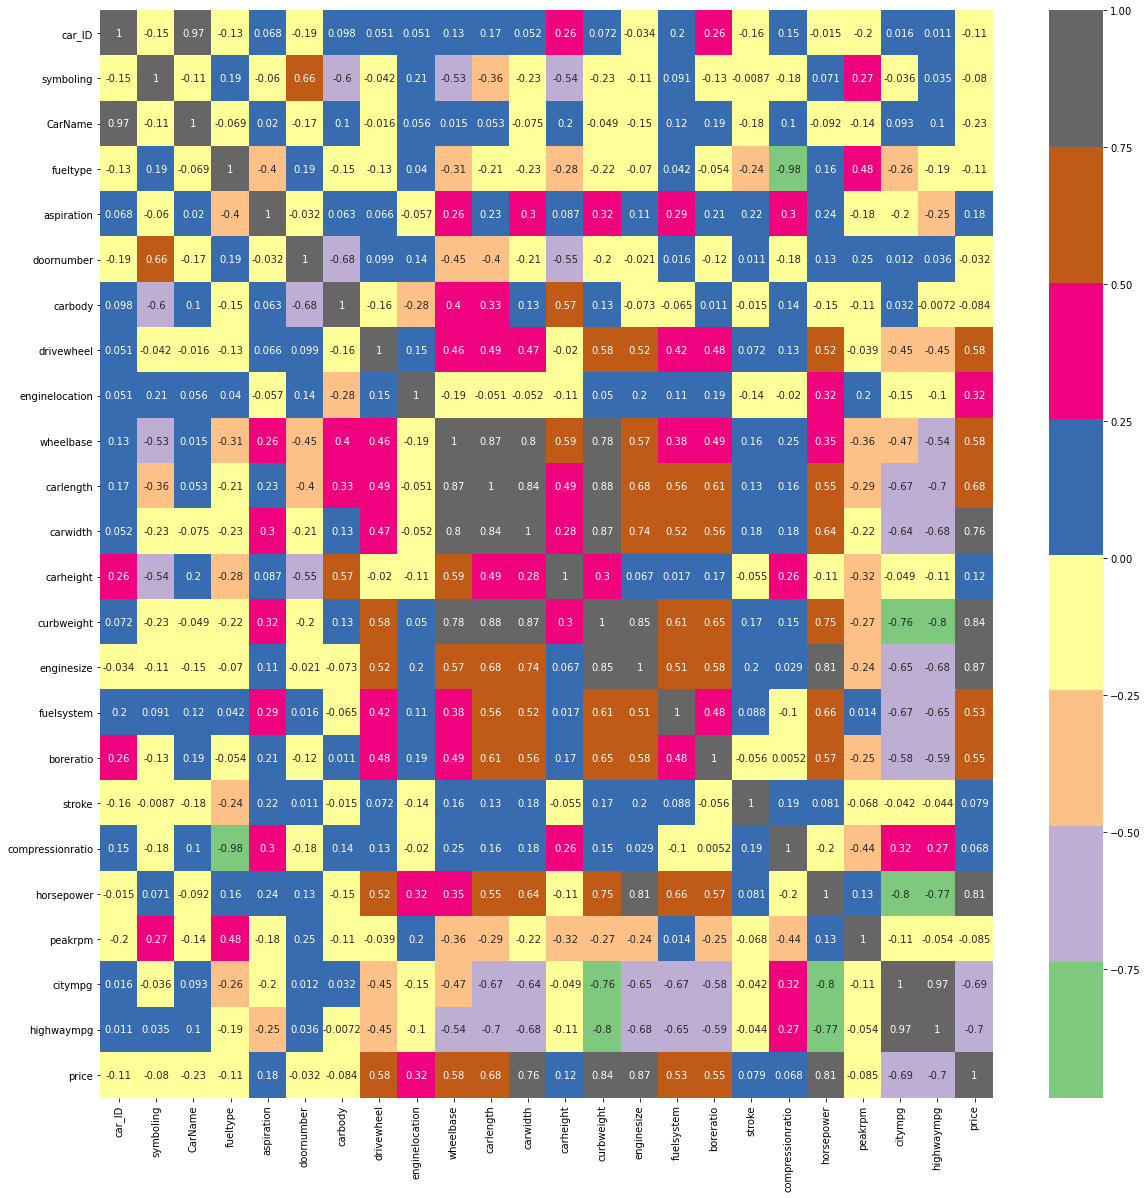

In [12]:
plt.figure(figsize=(20,20))
import seaborn as sns
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="Accent")


In [13]:
data1=data[
    [   'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'price']
]

In [14]:
data1

,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,horsepower,price
0,0,88.6,168.8,64.1,48.8,2548,130,3.47,111,13495.0
1,0,88.6,168.8,64.1,48.8,2548,130,3.47,111,16500.0
2,0,94.5,171.2,65.5,52.4,2823,152,2.68,154,16500.0
3,0,99.8,176.6,66.2,54.3,2337,109,3.19,102,13950.0
4,0,99.4,176.6,66.4,54.3,2824,136,3.19,115,17450.0
...,...,...,...,...,...,...,...,...,...,...
200,0,109.1,188.8,68.9,55.5,2952,141,3.78,114,16845.0
201,0,109.1,188.8,68.8,55.5,3049,141,3.78,160,19045.0
202,0,109.1,188.8,68.9,55.5,3012,173,3.58,134,21485.0
203,0,109.1,188.8,68.9,55.5,3217,145,3.01,106,22470.0


In [15]:
data1.shape
data1.head()


,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,horsepower,price
0,0,88.6,168.8,64.1,48.8,2548,130,3.47,111,13495.0
1,0,88.6,168.8,64.1,48.8,2548,130,3.47,111,16500.0
2,0,94.5,171.2,65.5,52.4,2823,152,2.68,154,16500.0
3,0,99.8,176.6,66.2,54.3,2337,109,3.19,102,13950.0
4,0,99.4,176.6,66.4,54.3,2824,136,3.19,115,17450.0


In [16]:
x=(data1.loc[:,data1.columns != 'price'])
y=(data1.loc[:,data1.columns == 'price'])
y

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [32]:
    model=Sequential()
    model.add(tf.keras.layers.Dense(16,activation='relu',input_shape=(9,)))
    model.add(tf.keras.layers.Dense(1,))

In [33]:
model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])

In [34]:
model.fit(x_train,y_train,epochs=500)

Epoch 1/500
5/5 [==============================] - 0s 2ms/step - loss: 177184901.3333 - mae: 11328.0117
Epoch 2/500
5/5 [==============================] - 0s 2ms/step - loss: 183760058.6667 - mae: 11402.5417
Epoch 3/500
5/5 [==============================] - 0s 3ms/step - loss: 164669998.6667 - mae: 10794.3169
Epoch 4/500
5/5 [==============================] - 0s 3ms/step - loss: 163533405.3333 - mae: 10700.2316
Epoch 5/500
5/5 [==============================] - 0s 4ms/step - loss: 170354973.3333 - mae: 10731.9624
Epoch 6/500
5/5 [==============================] - 0s 2ms/step - loss: 154399076.0000 - mae: 10350.0360
Epoch 7/500
5/5 [==============================] - 0s 3ms/step - loss: 153125052.0000 - mae: 10380.8354
Epoch 8/500
5/5 [==============================] - 0s 3ms/step - loss: 147934582.6667 - mae: 10113.0376
Epoch 9/500
5/5 [==============================] - 0s 3ms/step - loss: 146995152.0000 - mae: 10016.7005
Epoch 10/500
5/5 [==============================] - 0s 3ms/step 

5/5 [==============================] - 0s 3ms/step - loss: 36600555.3333 - mae: 4392.8054
Epoch 81/500
5/5 [==============================] - 0s 2ms/step - loss: 31874419.3333 - mae: 4002.4342
Epoch 82/500
5/5 [==============================] - 0s 3ms/step - loss: 36588057.3333 - mae: 4501.1761
Epoch 83/500
5/5 [==============================] - 0s 2ms/step - loss: 27032902.6667 - mae: 3939.7142
Epoch 84/500
5/5 [==============================] - 0s 3ms/step - loss: 30375626.0000 - mae: 4120.8668
Epoch 85/500
5/5 [==============================] - 0s 5ms/step - loss: 33838117.3333 - mae: 4306.6150
Epoch 86/500
5/5 [==============================] - 0s 3ms/step - loss: 33170415.3333 - mae: 4260.5650
Epoch 87/500
5/5 [==============================] - 0s 3ms/step - loss: 34623398.0000 - mae: 4332.4720
Epoch 88/500
5/5 [==============================] - 0s 2ms/step - loss: 27973933.1667 - mae: 4087.6145
Epoch 89/500
5/5 [==============================] - 0s 2ms/step - loss: 30873457.3333 

5/5 [==============================] - 0s 2ms/step - loss: 36598874.3333 - mae: 4482.4180
Epoch 160/500
5/5 [==============================] - 0s 2ms/step - loss: 34154688.0000 - mae: 4430.1785
Epoch 161/500
5/5 [==============================] - 0s 3ms/step - loss: 30967838.6667 - mae: 4233.6188
Epoch 162/500
5/5 [==============================] - 0s 3ms/step - loss: 30975725.0000 - mae: 4238.0875
Epoch 163/500
5/5 [==============================] - 0s 2ms/step - loss: 31358667.3333 - mae: 4225.9289
Epoch 164/500
5/5 [==============================] - 0s 2ms/step - loss: 29249920.0000 - mae: 4150.2441
Epoch 165/500
5/5 [==============================] - 0s 2ms/step - loss: 27619746.6667 - mae: 4039.2338
Epoch 166/500
5/5 [==============================] - 0s 3ms/step - loss: 30646348.6667 - mae: 4156.6406
Epoch 167/500
5/5 [==============================] - 0s 3ms/step - loss: 30774396.3333 - mae: 4183.2712
Epoch 168/500
5/5 [==============================] - 0s 3ms/step - loss: 30026

5/5 [==============================] - 0s 3ms/step - loss: 27344298.3333 - mae: 3977.8365
Epoch 238/500
5/5 [==============================] - 0s 2ms/step - loss: 27628415.6667 - mae: 3977.1420
Epoch 239/500
5/5 [==============================] - 0s 3ms/step - loss: 30135157.0000 - mae: 4171.9465
Epoch 240/500
5/5 [==============================] - 0s 2ms/step - loss: 32058571.3333 - mae: 4292.4954
Epoch 241/500
5/5 [==============================] - 0s 2ms/step - loss: 31501974.3333 - mae: 4168.6323
Epoch 242/500
5/5 [==============================] - 0s 3ms/step - loss: 25891759.1667 - mae: 3915.4680
Epoch 243/500
5/5 [==============================] - 0s 2ms/step - loss: 26837358.6667 - mae: 3994.0688
Epoch 244/500
5/5 [==============================] - 0s 3ms/step - loss: 29691881.3333 - mae: 4126.3846
Epoch 245/500
5/5 [==============================] - 0s 3ms/step - loss: 25089609.6667 - mae: 3921.8104
Epoch 246/500
5/5 [==============================] - 0s 2ms/step - loss: 31874

5/5 [==============================] - 0s 2ms/step - loss: 27862807.0000 - mae: 3887.7730
Epoch 316/500
5/5 [==============================] - 0s 3ms/step - loss: 27917664.6667 - mae: 4048.4047
Epoch 317/500
5/5 [==============================] - 0s 2ms/step - loss: 31490737.3333 - mae: 4022.3955
Epoch 318/500
5/5 [==============================] - 0s 2ms/step - loss: 27823175.6667 - mae: 4049.0037
Epoch 319/500
5/5 [==============================] - 0s 2ms/step - loss: 28841727.0000 - mae: 4096.8347
Epoch 320/500
5/5 [==============================] - 0s 3ms/step - loss: 30005574.6667 - mae: 4091.3929
Epoch 321/500
5/5 [==============================] - 0s 2ms/step - loss: 24960866.0000 - mae: 3892.2973
Epoch 322/500
5/5 [==============================] - 0s 3ms/step - loss: 28025403.0000 - mae: 4029.0015
Epoch 323/500
5/5 [==============================] - 0s 3ms/step - loss: 27703649.3333 - mae: 4008.5095
Epoch 324/500
5/5 [==============================] - 0s 3ms/step - loss: 27557

5/5 [==============================] - 0s 2ms/step - loss: 30270071.3333 - mae: 4045.5236
Epoch 394/500
5/5 [==============================] - 0s 3ms/step - loss: 22814259.3333 - mae: 3731.0144
Epoch 395/500
5/5 [==============================] - 0s 2ms/step - loss: 21511243.1667 - mae: 3590.5414
Epoch 396/500
5/5 [==============================] - 0s 2ms/step - loss: 23069164.3333 - mae: 3806.3898
Epoch 397/500
5/5 [==============================] - 0s 2ms/step - loss: 25122485.6667 - mae: 3960.3863
Epoch 398/500
5/5 [==============================] - 0s 3ms/step - loss: 20997225.6667 - mae: 3539.4764
Epoch 399/500
5/5 [==============================] - 0s 2ms/step - loss: 27646677.6667 - mae: 3929.9690
Epoch 400/500
5/5 [==============================] - 0s 3ms/step - loss: 24322147.6667 - mae: 3815.1259
Epoch 401/500
5/5 [==============================] - 0s 3ms/step - loss: 25114048.1667 - mae: 3847.0836
Epoch 402/500
5/5 [==============================] - 0s 3ms/step - loss: 24016

5/5 [==============================] - 0s 2ms/step - loss: 28027500.3333 - mae: 4012.8208
Epoch 472/500
5/5 [==============================] - 0s 3ms/step - loss: 22938172.3333 - mae: 3637.2309
Epoch 473/500
5/5 [==============================] - 0s 3ms/step - loss: 25478579.6667 - mae: 3822.5380
Epoch 474/500
5/5 [==============================] - 0s 3ms/step - loss: 25030786.3333 - mae: 3821.3105
Epoch 475/500
5/5 [==============================] - 0s 2ms/step - loss: 29292420.3333 - mae: 3963.7553
Epoch 476/500
5/5 [==============================] - 0s 2ms/step - loss: 24071073.3333 - mae: 3704.9163
Epoch 477/500
5/5 [==============================] - 0s 2ms/step - loss: 23540564.0000 - mae: 3615.2106
Epoch 478/500
5/5 [==============================] - 0s 2ms/step - loss: 23804494.6667 - mae: 3693.4937
Epoch 479/500
5/5 [==============================] - 0s 2ms/step - loss: 24509394.3333 - mae: 3732.8197
Epoch 480/500
5/5 [==============================] - 0s 2ms/step - loss: 24107

In [35]:
y_perdict=model.predict(x_test)

In [42]:
y_perdict[0]
# print(x_test)

array([19445.986], dtype=float32)